# Unsupervised Learning - Clustering  
https://github.com/subhadarship/kmeans_pytorch/tree/master

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from time import time
from kmeans_pytorch import kmeans, kmeans_predict

## K-means Clustering  

1. Set K – number of clusters
2. Randomly assign k points as the centroid of the clusers
3. Measure distance between point a and the k clusters
4. Assign point a to the cluster with the minimum distance
5. Repeat 3-4 for all data points
6. Recalculate the cluster centroid
7. Repeat 5-6 until the clusters don’t change anymore
8. Calculate total clusters variance
9. Repeat 2-8 N times, result is the clustering with the minimum variance
ariance


In [7]:
# set random seed
np.random.seed(123)
# data
data_size, dims, num_clusters = 1000, 2, 3
x = np.random.randn(data_size, dims) / 6
x = torch.from_numpy(x)
# more data
y = np.random.randn(5, dims) / 6
y = torch.from_numpy(y)

In [8]:
# set device
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [9]:
# k-means
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean', device=device
)

running k-means on cpu..


[running kmeans]: 9it [00:00, 785.34it/s, center_shift=0.000058, iteration=9, tol=0.000100]


In [10]:
# predict cluster ids for y
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)

predicting on cpu..


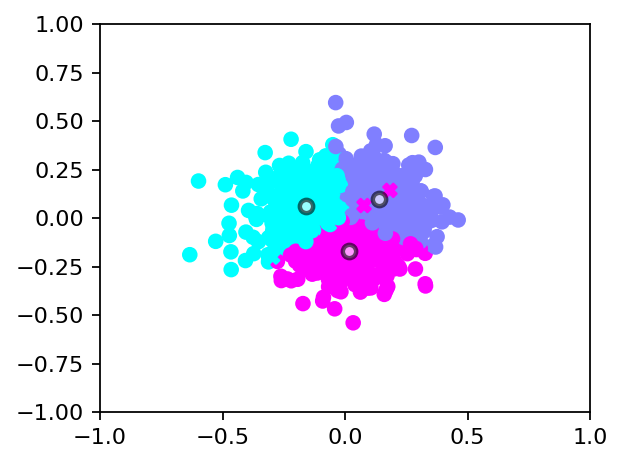

In [11]:
# plot
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool', marker='X')
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)
plt.axis([-1, 1, -1, 1])
plt.tight_layout()
plt.show()

## K-means CPU vs GPU

In [12]:
# dimensions, num clusters
dims, num_clusters = 2, 3

# data sizes
data_sizes = [100000, 1000000, 5000000, 10000000]

In [13]:
gpu_times = []
cpu_times = []

for data_size in data_sizes:
    print(f'\ndata size: {data_size}')

    # data
    x = np.random.randn(data_size, dims) / 6
    x = torch.from_numpy(x)

    # gpu
    start_gpu = time()
    kmeans_gpu = kmeans(X=x, num_clusters=num_clusters, device=torch.device('cuda:0'))
    gpu_time = time() - start_gpu
    gpu_times.append(gpu_time)
    print(f'gpu time: {gpu_time}')
    
    # cpu
    start_cpu = time()
    kmeans_cpu = kmeans(X=x, num_clusters=num_clusters, device=torch.device('cpu'))
    cpu_time = time() - start_cpu
    cpu_times.append(cpu_time)
    print(f'cpu time: {cpu_time}')


data size: 100000
running k-means on cuda:0..


RuntimeError: No CUDA GPUs are available

ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

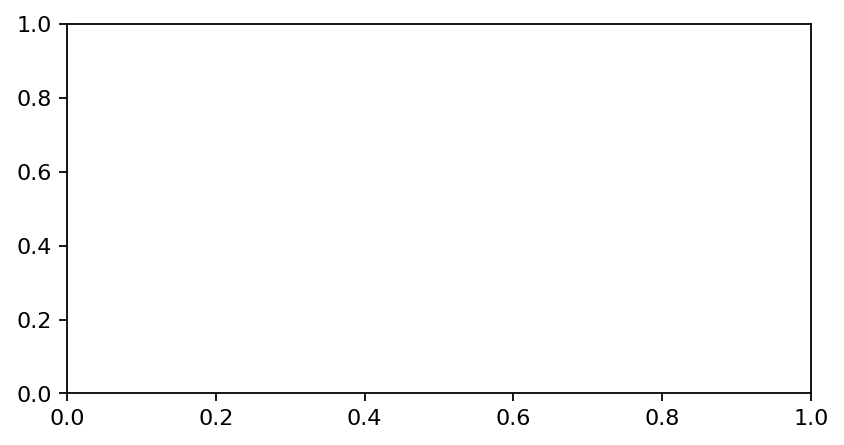

In [14]:
# plot
plt.figure(figsize=(6, 3), dpi=160)
plt.plot(data_sizes, gpu_times, marker='o', label='gpu', color='xkcd:vermillion')
plt.plot(data_sizes, cpu_times, marker='o', label='cpu', color='xkcd:neon blue')
plt.xticks(data_sizes)
plt.legend(fontsize=12)
plt.grid(alpha=0.2)
plt.xlabel('data size', fontsize=14)
plt.ylabel('time (s)', fontsize=14)
plt.show()

## Neural Network Clustering

In [16]:
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
# import jupyter_to_medium
# import jovian


ModuleNotFoundError: No module named 'scipy'

In [ ]:
dataframe_raw = pd.read_csv('bottle.csv')
dataframe_raw.head()

In [ ]:
dataframe_raw.describe()

In [ ]:
#let's get the column names
input_cols = list(calcofi_subset.columns.values)
print(input_cols)

In [ ]:
calcofi_subset = dataframe_raw.loc[:,'Depthm':'O2Satq']

In [ ]:
# Compute the correlation matrix
corr = calcofi_subset.drop(['T_degC'], axis=1).corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, cbar_kws={"shrink": .5});

In [ ]:
corr_with_temp = calcofi_subset.corr()['T_degC'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
corr_with_isi.drop('T_degC').plot.bar()
plt.show();

In [ ]:
dataframe = calcofi_subset.filter(items=['T_degC', 'Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg'])
dataframe.isnull().sum()

In [ ]:
# Let's compare for each variable options fillna() vs mean()
fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.T_degC.fillna(dataframe.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.Salnty.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.Salnty.fillna(dataframe.Salnty.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.O2ml_L.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.O2ml_L.fillna(dataframe.O2ml_L.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.STheta.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.STheta.fillna(dataframe.STheta.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe.O2Sat.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe.O2Sat.fillna(dataframe.O2Sat.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

fig, ax=plt.subplots(1,2)
sns.distplot(dataframe['Oxy_µmol/Kg'].dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(dataframe['Oxy_µmol/Kg'].fillna(dataframe['Oxy_µmol/Kg'].mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [ ]:
def customize_dataset(data):
    dataframe = data.copy(deep=True)
    #select only 7 variables
    dataframe = dataframe.filter(items=['T_degC', 'Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg'])
    #fill na values
    dataframe = dataframe.groupby(dataframe.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
    return dataframe

In [ ]:
dataframe = customize_dataset(calcofi_subset)
dataframe.isnull().sum() 